# STAT207 Mini-Project #2 - INSERT TITLE HERE


YOUR NAME

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold


## 1. Introduction

In [136]:
df = pd.read_csv('rams_batch_cur_20250325.csv')
df

,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,...,rb_new_bhv_scr,rb_crd_gr_new_crd_gr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,779,0,0,0,2,2,5000,782,25000,0,...,776,R,2024-12-17,997.56,521.07,647.86,1045.03,858.49,334.54,2
1,735,0,999,0,1,2,0,836,1500,0,...,735,R,2025-02-21,0.00,37.65,60.25,175.67,54.08,0.00,0
2,745,0,0,0,1,2,8000,832,40000,0,...,748,R,2024-10-10,1024.55,578.80,665.81,816.43,2526.27,3129.23,1
3,13,0,0,0,1,0,60,684,300,0,...,13,O,2025-01-27,0.00,0.00,0.00,0.00,0.00,0.00,0
4,6,0,999,0,1,7,0,681,5200,0,...,6,P,2025-03-19,895.33,0.00,0.00,0.00,0.00,0.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96794,6,0,0,30,1,15,90,711,900,0,...,628,K,2024-11-14,0.00,185.10,0.00,0.00,0.00,0.00,15
96795,709,0,0,0,1,8,999999999999999,833,6700,0,...,703,R,2025-02-27,0.00,0.00,0.00,0.00,0.00,0.00,7
96796,755,0,0,0,1,5,3320,759,16600,0,...,761,R,2025-01-24,1037.83,899.65,1111.87,954.31,865.07,912.63,5
96797,748,0,0,0,1,0,800,788,4000,0,...,748,R,2025-02-20,0.00,0.00,0.00,0.00,43.52,0.00,0


## 2. Dataset Discussion

 The column cu_bhv_scr likely refers to the customer behavioral score, which is a metric used to evaluate a customer’s financial behavior
 
 The column cu_nbr_of_plastics likely refers to the number of plastic cards (e.g., credit cards, debit cards, or prepaid cards) a customer owns. 
 
 The column ca_avg_utilz_lst_6_mnths likely refers to the average utilization of a credit account over the last 6 months.
 
 cu_cash_line_am likely refers to the cash line amount associated with a customer

 The column cu_crd_bureau_scr likely refers to the credit bureau score associated with a customer.

 The column cu_crd_line most likely refers to the customer's credit line, which represents the total amount of credit available to a customer.

 The column cu_cur_balance most likely refers to the customer's current balance. This value represents the total amount a customer currently owes or has available in a specific account, such as a credit card, loan, or line of credit.

 The column ca_mnths_since_active. Meaning: Number of months since the credit account (ca) was last active.

 The column rb_new_bhv_scr. Meaning: New behavioral score (rb) related to the customer’s recent financial activity.



## 3. Dataset Cleaning

In [137]:
df9 = df[['cu_bhv_scr', 'cu_nbr_of_plastics', 'ca_avg_utilz_lst_6_mnths', 'cu_cash_line_am', 'cu_crd_bureau_scr', 'cu_crd_line', 'ca_mnths_since_active', 'rb_new_bhv_scr', 'cu_cur_balance']]
df9 = df9.head(5000)
df9

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr,cu_cur_balance
0,779,2,2,5000,782,25000,0,776,1017.56
1,735,1,2,0,836,1500,1,735,20.00
2,745,1,2,8000,832,40000,0,748,1037.55
3,13,1,0,60,684,300,12,13,20.00
4,6,1,7,0,681,5200,0,6,851.73
...,...,...,...,...,...,...,...,...,...
4995,760,1,8,3000,843,15000,0,760,1201.50
4996,751,1,0,999999999999999,665,2300,0,743,35.56
4997,731,1,0,4000,843,20000,1,736,20.00
4998,671,1,44,0,625,800,0,673,323.88


In [138]:
df9.isna().sum()


cu_bhv_scr                  0
cu_nbr_of_plastics          0
ca_avg_utilz_lst_6_mnths    0
cu_cash_line_am             0
cu_crd_bureau_scr           0
cu_crd_line                 0
ca_mnths_since_active       0
rb_new_bhv_scr              0
cu_cur_balance              0
dtype: int64

The function shows that there is no explicit missing value in the dataset. 

In [139]:
df9.dtypes

cu_bhv_scr                    int64
cu_nbr_of_plastics            int64
ca_avg_utilz_lst_6_mnths      int64
cu_cash_line_am               int64
cu_crd_bureau_scr             int64
cu_crd_line                   int64
ca_mnths_since_active         int64
rb_new_bhv_scr                int64
cu_cur_balance              float64
dtype: object

In [140]:
np.unique(df9['cu_cur_balance'].values)

array([-1976.  ,  -973.64,  -859.  , ..., 22117.66, 23246.36, 24170.5 ])

The above function shows that there is no implicit missing value in the dataset. 

## 4. Preliminary Analysis

In [141]:
df9.corr()

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr,cu_cur_balance
cu_bhv_scr,1.000000,0.161423,0.238064,-0.190797,0.129731,0.356495,0.022672,0.893416,0.258214
cu_nbr_of_plastics,0.161423,1.000000,-0.016518,-0.333566,0.146301,0.437074,0.033246,0.163820,0.169835
ca_avg_utilz_lst_6_mnths,0.238064,-0.016518,1.000000,0.101296,-0.146383,-0.040037,0.071960,0.252379,0.403272
cu_cash_line_am,-0.190797,-0.333566,0.101296,1.000000,-0.102770,-0.244608,0.091450,-0.194822,-0.014671
cu_crd_bureau_scr,0.129731,0.146301,-0.146383,-0.102770,1.000000,0.299363,0.134781,0.124400,0.037438
cu_crd_line,0.356495,0.437074,-0.040037,-0.244608,0.299363,1.000000,-0.008054,0.351815,0.416110
ca_mnths_since_active,0.022672,0.033246,0.071960,0.091450,0.134781,-0.008054,1.000000,0.013857,-0.003975
rb_new_bhv_scr,0.893416,0.163820,0.252379,-0.194822,0.124400,0.351815,0.013857,1.000000,0.261637
cu_cur_balance,0.258214,0.169835,0.403272,-0.014671,0.037438,0.416110,-0.003975,0.261637,1.000000


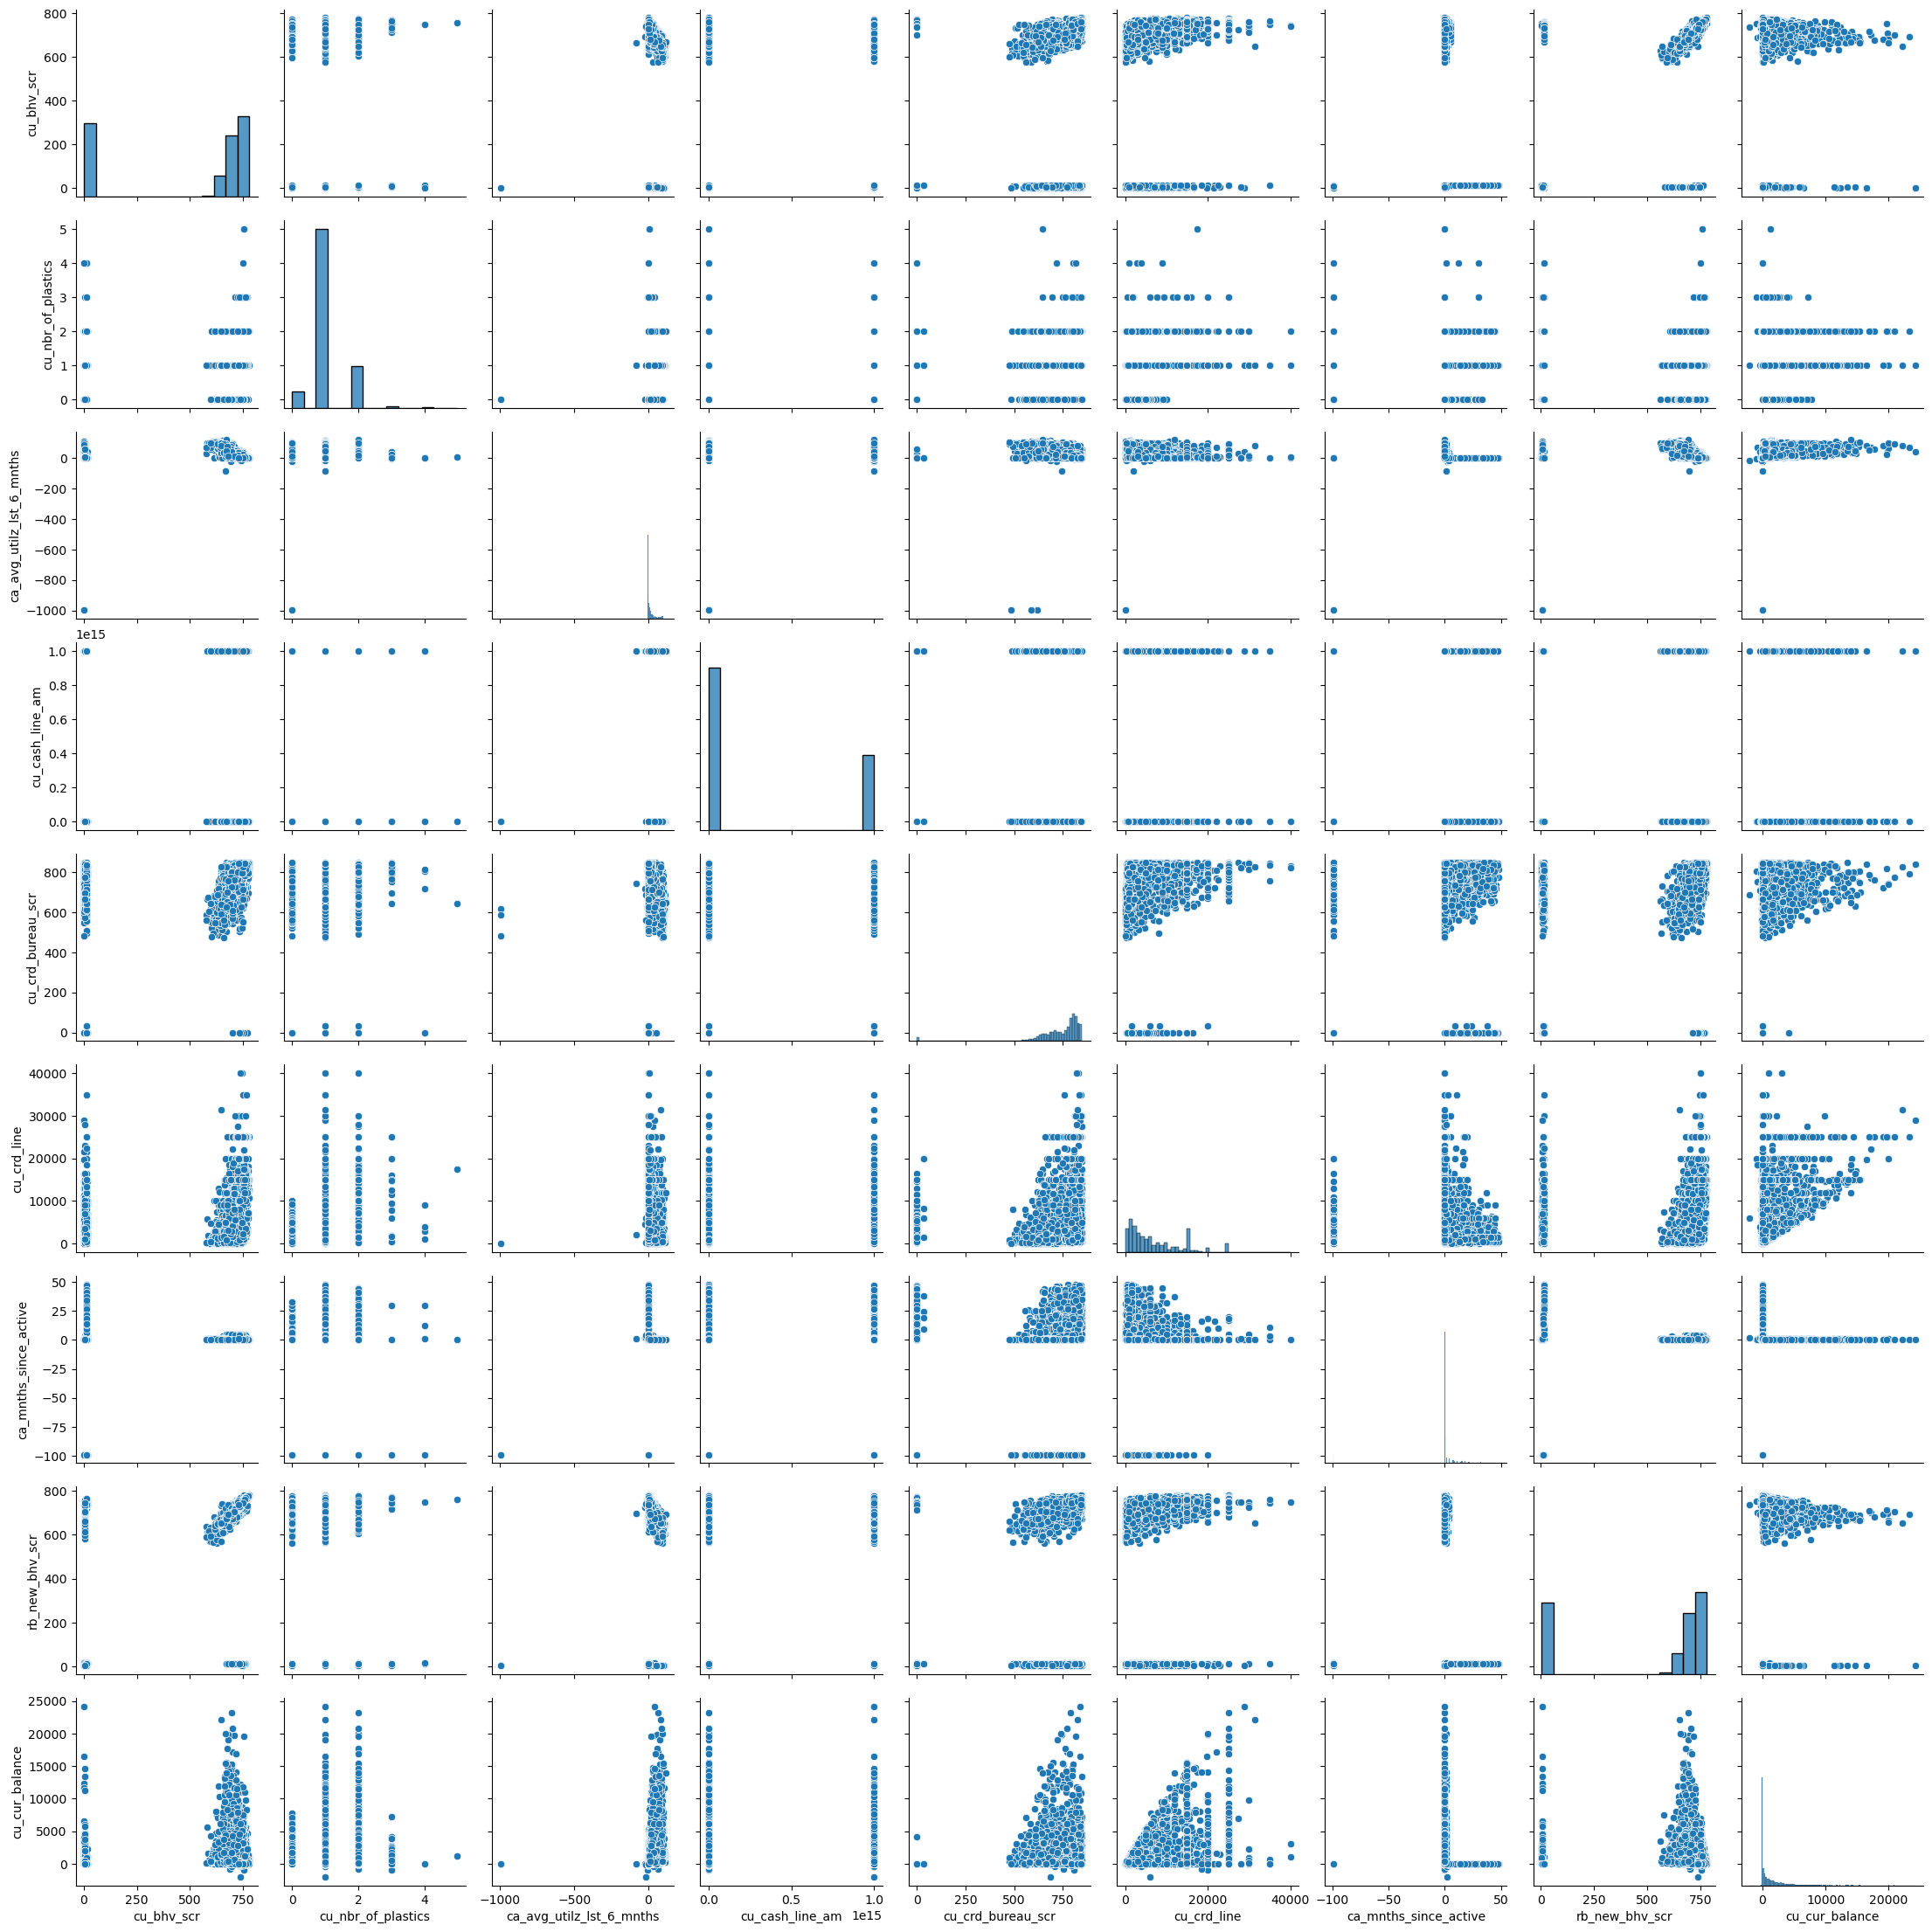

In [142]:
sns.pairplot(df9)


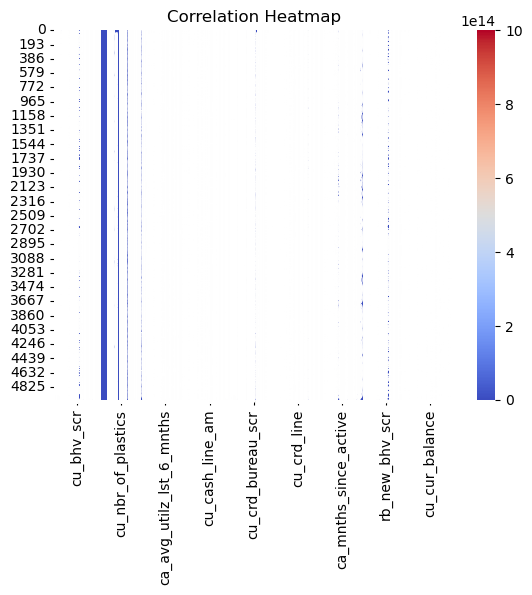

In [143]:
sns.heatmap(df9, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
fadsfasf``

## 5. Predictive Models

In [144]:
df_train, df_test = train_test_split(df9, test_size = 0.2, random_state=555)

In [145]:
x_df_train = df_train.drop(['cu_cur_balance'], axis = 1)
x_df_train.head(5)

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr
3185,671,1,70,999999999999999,708,4000,1,681
3159,675,1,56,24,586,120,0,634
3102,13,1,0,900,835,4500,7,13
120,772,1,3,3000,821,15000,0,773
2567,690,2,15,999999999999999,723,7000,1,690


In [146]:
y_df_train = df_train['cu_cur_balance']
y_df_train

3185    2934.60
3159     132.54
3102      20.00
120      175.00
2567     998.33
         ...   
233      236.19
1430    2665.58
2628    4717.68
1057     223.34
4782      20.00
Name: cu_cur_balance, Length: 4000, dtype: float64

In [147]:
x_df_test = df_test.drop(['cu_cur_balance'], axis = 1)
x_df_test.head(5)

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr
4434,638,1,80,0,601,400,0,658
3169,14,2,0,999999999999999,0,1500,34,14
735,0,1,0,1000,0,5000,-99,15
3720,732,1,0,0,791,1000,5,13
3974,630,1,80,180,651,900,0,615


In [148]:
y_df_test = df_test['cu_cur_balance']
y_df_test

4434      362.67
3169       20.00
735        20.00
3720       20.00
3974      935.30
          ...   
2220       20.00
3279       20.00
4746    11517.30
4948       20.00
1481      948.24
Name: cu_cur_balance, Length: 1000, dtype: float64

In [149]:
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(x_df_train)
X_train = pd.DataFrame(scaled_expl_vars, columns=x_df_train.columns)
X_train 

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr
0,0.531651,-0.241660,1.460537,1.470393,-0.279132,-0.468799,0.025435,0.541507
1,0.543828,-0.241660,1.067280,-0.680090,-1.302352,-1.072140,-0.021689,0.396707
2,-1.471497,-0.241660,-0.505750,-0.680090,0.786024,-0.391049,0.308176,-1.516507
3,0.839125,-0.241660,-0.421481,-0.680090,0.668605,1.241703,-0.021689,0.824946
4,0.589492,1.759664,-0.084403,1.470393,-0.153326,-0.002299,0.025435,0.569235
...,...,...,...,...,...,...,...,...
3995,0.784328,3.760987,-0.252942,-0.680090,0.484090,-0.795350,-0.021689,0.766410
3996,0.519474,-0.241660,0.645932,1.470393,-0.354615,-0.173349,-0.021689,0.467567
3997,0.595581,-0.241660,1.320088,-0.680090,-0.279132,0.059901,-0.021689,0.575397
3998,0.348993,-0.241660,1.011100,-0.680090,-1.319126,-1.028600,0.025435,0.409030


In [150]:
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(x_df_test)
X_test = pd.DataFrame(scaled_expl_vars, columns=x_df_test.columns)
X_test

,cu_bhv_scr,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,ca_mnths_since_active,rb_new_bhv_scr
0,0.420226,-0.237947,1.417632,-0.681270,-0.984152,-1.008885,0.022037,0.492430
1,-1.491954,1.635649,-0.431825,1.467847,-5.448456,-0.832914,1.476887,-1.472859
2,-1.534855,-0.237947,-0.431825,-0.681270,-5.448456,-0.273004,-4.214145,-1.469807
3,0.708279,-0.237947,-0.431825,-0.681270,0.427191,-0.912901,0.235985,-1.475910
4,0.395711,-0.237947,1.417632,-0.681270,-0.612746,-0.928898,0.022037,0.361207
...,...,...,...,...,...,...,...,...
995,-1.491954,-0.237947,-0.431825,1.467847,0.248916,-0.752927,1.776415,-1.472859
996,0.726665,-0.237947,-0.431825,-0.681270,-0.085349,-0.273004,0.235985,-1.475910
997,0.677635,1.635649,0.516022,-0.681270,0.709460,2.926477,0.022037,0.693841
998,0.769567,-0.237947,-0.431825,-0.681270,0.531185,-0.512965,0.022037,0.779289


In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.01, 0.1, 0.5, 1.0, 10]

for alpha in alphas:
    lasso_mod = Lasso(alpha=alpha, max_iter=1000)
    lasso_mod.fit(X_train, y_df_train)
    score = lasso_mod.score(X_test, y_df_test)
    print(f"Alpha: {alpha}, Score: {score}")

Alpha: 0.01, Score: 0.3319980224476353
Alpha: 0.1, Score: 0.3319988163235785
Alpha: 0.5, Score: 0.3320019715449519
Alpha: 1.0, Score: 0.33200536977167483
Alpha: 10, Score: 0.3319470549918583
Alpha: 10.1, Score: 0.3319452174449028


In [173]:
best_lasso_mod = Lasso(alpha=10, max_iter=1000)
best_lasso_mod.fit(X_train, y_df_train)

Lasso(alpha=10)

best_lasso_mod = Lasso(alpha=alpha, max_iter=1000)

alpha = 1.0 best matches our goal. 

In [174]:
df_slopes = pd.DataFrame({'best_mod_pair' : best_lasso_mod.coef_.T}, index = x_df_train.columns)
df_slopes

,best_mod_pair
cu_bhv_scr,19.185940
cu_nbr_of_plastics,-14.623904
ca_avg_utilz_lst_6_mnths,936.386647
cu_cash_line_am,106.754181
cu_crd_bureau_scr,-56.878928
cu_crd_line,972.942018
ca_mnths_since_active,-59.598538
rb_new_bhv_scr,16.422735


However, I found unfair for the dummy variable. 

In [182]:
lin_mod = LinearRegression()
en_mod_perams = ElasticNet(alpha = 0.05, l1_ratio = 0.7, max_iter = 1000)
en_mod1 = ElasticNet(alpha = 0.5, l1_ratio = 0.7, max_iter = 1000)
en_mod2 = ElasticNet(alpha = 1, l1_ratio = 0.7, max_iter = 1000)
en_mod3 = ElasticNet(alpha = 2.5, l1_ratio = 0.7, max_iter = 1000)

In [183]:
from sklearn.model_selection import KFold
cross_val = KFold(n_splits=4, shuffle = True, random_state=207)
cross_val

KFold(n_splits=4, random_state=207, shuffle=True)

In [184]:
from sklearn.model_selection import cross_val_score
test_fold_r2 = cross_val_score(lin_mod, X_train, y_df_train, cv = cross_val, scoring = 'r2')
print('Test Fold R^2 Values:', test_fold_r2)
print('Mean Test Fold R^2:', test_fold_r2.mean())
print('std Test Fold R^2:', test_fold_r2.std())

Test Fold R^2 Values: [0.2611678  0.40947115 0.4011267  0.26496927]
Mean Test Fold R^2: 0.33418373039711546
std Test Fold R^2: 0.07118904934591294


## 6. Best Model Discussion

## 7. Conclusion